# 2. Mengimpor pustaka/modul python yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np 

import re
import string

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.io as pio
pio.renderers.default = 'colab'
from wordcloud import WordCloud,STOPWORDS

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

import tensorflow as tf
from tensorflow import keras
from keras import layers

# 3. Data Understanding

## 3.1 Menyiapkan path dataset pada penyimpanan drive serta menampilkan overview dataset Movie menggunakan library pandas

In [2]:
movies_meta_data = pd.read_csv('movies.csv')

movies_meta_data

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


### 3.2 Menampilkan keterangan jumlah/panjang data unique daftar film dan data pengguna/user

In [3]:
print('Banyak Data movies ID: ', len(movies_meta_data.movieId.unique()))

Banyak Data movies ID:  9742


### 3.3 Menampilkan keterangan kolom dataset

In [4]:
# Memuat informasi dataframe movies_meta_data
movies_meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


### 3.4 Menampilkan Daftar Genre pada dataset

In [5]:
print('Jenis-jenis Genre pada dataset: ', movies_meta_data.genres.unique())

Jenis-jenis Genre pada dataset:  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Children|Comedy' 'Drama|War'
 'Action|Crime|Drama' 'Action|Adventure|Fantasy' 'Comedy|Drama|Thriller'
 'Mystery|Thriller' 'Animation|Children|Drama|Musical|Romance'
 'Crime|Mystery|Thriller' 'Adventure|Drama' 'Drama|Thriller'
 'Comedy|Crime' 'Action|Sci-Fi|Thriller' 'Action|Comedy|Horror|Thriller'
 'Comedy|Drama' 'Documentary' 'Action|Crime|Drama|Thriller'
 'Crime|Drama|Romance' 'Action|Adventure|Drama' 'Action|Thriller'
 'Drama|Horror|T

### 3.5 menghitung besar/panjang data genre secara unique

In [6]:
print('Jumlah data genre: ', len(movies_meta_data.genres.unique()))

Jumlah data genre:  951


### 3.6 Memuat deskripsi setiap kolom dataframe untuk perhitungan count, rata-rata, minimal value dan maximal value, dll

In [7]:
# Memuat deskripsi setiap kolom dataframe
movies_meta_data.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [8]:
# Menghitung jumlah data kosong pada setiap kolom
movies_meta_data.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

### 3.7 Memuat dataset ke dalam variable baru

In [9]:
# Memuat dataset ke dalam variable baru
movie = movies_meta_data.movieId.unique()

# Mengurutkan data dan menghapus data yang sama
movie = np.sort(np.unique(movie))

print('Jumlah seluruh data movie berdasarkan movieId: ', len(movie))

Jumlah seluruh data movie berdasarkan movieId:  9742


In [10]:
movie_info = pd.concat([movies_meta_data])

movie_info

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


### 3.8 Menampilkan jumlah kata paling banyak yg muncul dalam kolom genre

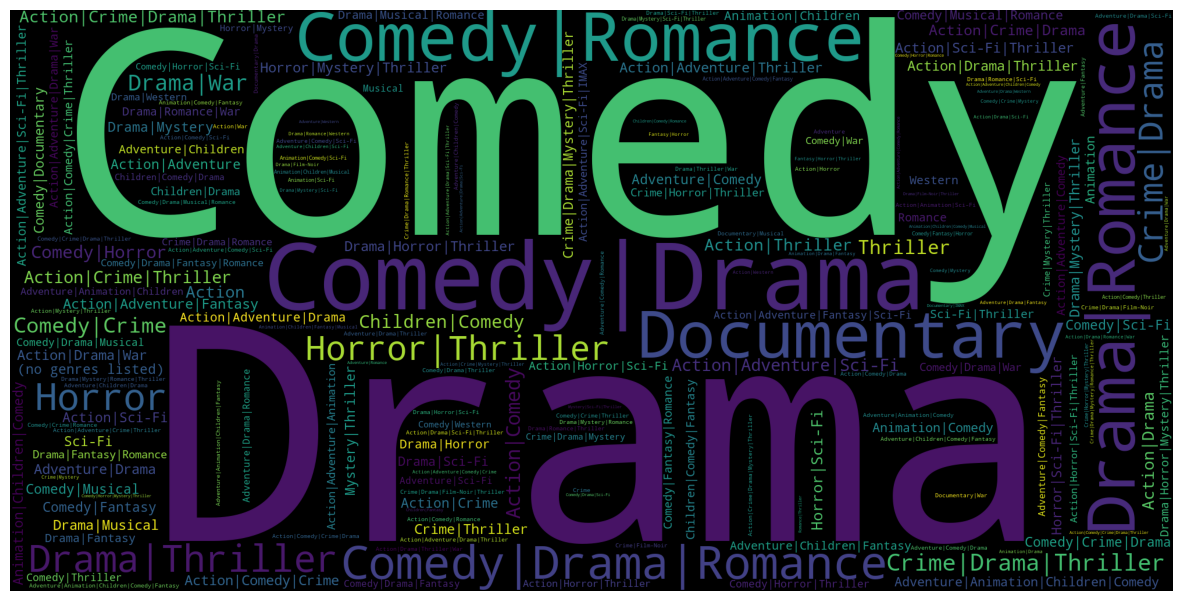

In [11]:
word_could_dict = Counter(movies_meta_data['genres'].tolist())
wordcloud = WordCloud(width = 2000, height = 1000).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 4. Data Preparation

### 4.1 Memilih kolom berdasarkan data yang dibutuhkan untuk melakukan content based learning berdasarkan genre yaitu judul dan genre

In [12]:
judul_movie = movies_meta_data['title'].tolist()
genre_movie = movies_meta_data['genres'].tolist()

print(len(judul_movie))
print(len(genre_movie))

9742
9742


### 4.2 Membuat data menjadi dalam bentuk dataframe sehingga mudah untuk dipersiapkan

In [13]:
data = pd.DataFrame({
    'judul': judul_movie,
    'genre': genre_movie
})

data

,judul,genre
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy
...,...,...
9737,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,Flint (2017),Drama
9740,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [14]:
# melihat informasi kolom pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   judul   9742 non-null   object
 1   genre   9742 non-null   object
dtypes: object(2)
memory usage: 152.3+ KB


### 4.3 Memuat banyak data dari setiap unique value berdasarkan genre

In [15]:
value_genre = pd.DataFrame(data['genre'].value_counts().reset_index().values, columns = ['genre', 'count'])
print(len(value_genre))
pd.options.display.max_colwidth = 500
value_genre

951


,genre,count
0,Drama,1053
1,Comedy,946
2,Comedy|Drama,435
3,Comedy|Romance,363
4,Drama|Romance,349
...,...,...
946,Children|Drama|Musical,1
947,Adventure|Drama|Horror|Mystery|Thriller,1
948,Adventure|Children|Comedy|Fantasy|Mystery,1
949,Adventure|Animation|Children|Western,1


In [16]:
# membuat data string tanda strip '-' pada variable data dihapus
data = data[data.genre != '-']

### Melihat kembali Jenis-Jenis Genre yang terdapat pada data

In [17]:
data.genre.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

### 4.3 Melakukan drop pada judul film yg double, dan berhasil menghapus beberapa judul

In [18]:
data = data.drop_duplicates('judul')
len(data)

9737

### 4.4 Mmelakukan indeks ulang pada data agar penomoran dilakukan berurutan

In [19]:
data.reset_index()
data

,judul,genre
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy
...,...,...
9737,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,Flint (2017),Drama
9740,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


### 4.5 Memasukkan nilai data masing-masing kolom ke dalam variabel baru

In [20]:
judul = data['judul'].tolist()
genre = data['genre'].tolist()

print(len(judul))
print(len(genre))

9737
9737


In [21]:
# mengecek ulang data yg dimasukkan ke dalam variable baru
data = pd.DataFrame({
    'judul': judul,
    'genre': genre
})
data

,judul,genre
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy
...,...,...
9732,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9733,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9734,Flint (2017),Drama
9735,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


## 4.6 Proses Data


### 4.6.1 Membangun sistem rekomendasi berdasarkan genre yang ada pada setiap movies.

In [22]:
# Inisialisasi CountVectorizer
tf = CountVectorizer()
 
# Melakukan perhitungan idf pada data genre
tf.fit(genre) 

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

### 4.6.2 Melakukan Proses fit dan melihat jumlah ukuran matrix

In [23]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(genre) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(9737, 24)

### 4.6.3 Mengubah vektor ke dalam bentuk matrix

In [24]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0, 1, 1, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

### 4.6.4 Melihat Daftar jumlah film berdasarkan genre dan melihat korelasi nya yg diperlihatkan dalam bentuk matrix

In [25]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names_out(),
    index=data.judul
).sample(22, axis=1).sample(10, axis=0)

,documentary,fi,crime,no,noir,action,children,fantasy,imax,sci,...,war,horror,adventure,comedy,western,animation,film,thriller,musical,genres
judul,,,,,,,,,,,,,,,,,,,,,
Barry Lyndon (1975),0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Atlantic City (1980),0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Superman IV: The Quest for Peace (1987),0,1,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
Robinson Crusoe on Mars (1964),0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Palmetto (1998),0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
"Secret of My Succe$s, The (a.k.a. The Secret of My Success) (1987)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Dr. Jekyll and Mr. Hyde (1941),0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
"Dark Knight, The (2008)",0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Blue Streak (1999),0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# 5 Modeling

### 5.1 Melatih Model dengan cosine similarity

In [26]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.77459667, 0.31622777, ..., 0.        , 0.31622777,
        0.4472136 ],
       [0.77459667, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 1.        , ..., 0.        , 0.        ,
        0.70710678],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.4472136 , 0.        , 0.70710678, ..., 0.        , 0.        ,
        1.        ]])

### 5.2 tahap ini menampilkan matriks kesamaan setiap judul dengan menampilkan judul film dalam 10 sampel kolom (axis = 1) dan 10 sampel baris (axis=0).

In [27]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['judul'], columns=genre)
print('Shape:', cosine_sim_df.shape)
 

cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (9737, 9737)


,Action|Adventure|Animation,Comedy|Romance,Comedy|Drama,Comedy,Comedy|Drama|Romance,Comedy,Drama|War,Comedy|Horror|Mystery|Thriller,Adventure|Documentary|Western,Drama|War
judul,,,,,,,,,,
Immortal Beloved (1994),0.000000,0.500000,0.500000,0.00000,0.816497,0.00000,0.500000,0.000000,0.000000,0.500000
A Silent Voice (2016),0.333333,0.408248,0.408248,0.00000,0.666667,0.00000,0.408248,0.000000,0.000000,0.408248
Investigation of a Citizen Above Suspicion (Indagine su un cittadino al di sopra di ogni sospetto) (1970),0.000000,0.000000,0.408248,0.00000,0.333333,0.00000,0.408248,0.288675,0.000000,0.408248
"Man with the Movie Camera, The (Chelovek s kino-apparatom) (1929)",0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.577350,0.000000
Meet Joe Black (1998),0.000000,0.707107,0.000000,0.00000,0.577350,0.00000,0.000000,0.000000,0.000000,0.000000
Six-String Samurai (1998),0.577350,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.288675,0.000000
"House of Mirth, The (2000)",0.000000,0.707107,0.000000,0.00000,0.577350,0.00000,0.000000,0.000000,0.000000,0.000000
Project A 2 ('A' gai wak juk jap) (1987),0.333333,0.408248,0.408248,0.57735,0.333333,0.57735,0.000000,0.288675,0.000000,0.000000
Pineapple Express (2008),0.333333,0.408248,0.408248,0.57735,0.333333,0.57735,0.000000,0.288675,0.000000,0.000000


# 6. Evaluasi Model

### 6.1 Pada tahap ini dilakukan indikasi dan diperlihatkan judul film berdasarkan urutan dari data

In [28]:
indices = pd.Series(index = data['judul'], data = data.index).drop_duplicates()
indices.head()

judul
Toy Story (1995)                      0
Jumanji (1995)                        1
Grumpier Old Men (1995)               2
Waiting to Exhale (1995)              3
Father of the Bride Part II (1995)    4
dtype: int64

### 6.2 Membuat fungsi untuk memanggil 20 rekomendasi film berdasarkan judul yang di input

In [29]:
def movie_recommendations(judul, cosine_sim = cosine_sim,items=data[['judul','genre']]):
    # Mengambil indeks dari judul film yang telah didefinisikan sebelumnnya
    idx = indices[judul]
    
    # Mengambil skor kemiripan dengan semua judul film 
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Mengurutkan film berdasarkan skor kemiripan
    sim_scores = sorted(sim_scores, key = lambda x : x[1], reverse = True)
    
    # Mengambil 20 skor kemiripan dari 1-20 karena urutan 0 memberikan indeks yang sama dengan judul film yang diinput
    sim_scores = sim_scores[1:20]
    
    # Mengambil judul film dari skor kemiripan
    movie_indices = [i[0] for i in sim_scores]
    
    # Mengembalikan 20 rekomendasi judul film dari kemiripan skor yang telah diurutkan dan menampilkan genre dari 20 rekomendasi film tersebut
    return pd.DataFrame(data['judul'][movie_indices]).merge(items)

In [30]:
# mengecek judul film di dalam data
data[data.judul.eq('Johnny English Reborn (2011)')]

,judul,genre
7723,Johnny English Reborn (2011),Adventure|Comedy|Thriller


## 6.3 Mencoba menampilkan 19 rekomendasi film dari judul yang telah di input menggunakan fungsi movie_recomendations

In [31]:
recomendation = pd.DataFrame(movie_recommendations('Johnny English Reborn (2011)'))
recomendation

,judul,genre
0,Topkapi (1964),Adventure|Comedy|Thriller
1,Johnny English Reborn (2011),Adventure|Comedy|Thriller
2,First Strike (Police Story 4: First Strike) (Ging chaat goo si 4: Ji gaan daan yam mo) (1996),Action|Adventure|Comedy|Thriller
3,Chill Factor (1999),Action|Adventure|Comedy|Thriller
4,"Mummy Returns, The (2001)",Action|Adventure|Comedy|Thriller
5,"What's Up, Tiger Lily? (1966)",Adventure|Comedy|Crime|Thriller
6,Dumb & Dumber (Dumb and Dumber) (1994),Adventure|Comedy
7,Another Stakeout (1993),Comedy|Thriller
8,"Cable Guy, The (1996)",Comedy|Thriller
9,Around the World in 80 Days (1956),Adventure|Comedy


In [32]:
# menghitung banyaknya data genre pada hasil rekomendasi yg dilakukan 
value = pd.DataFrame(recomendation['genre'].value_counts().reset_index().values, columns = ['genre', 'count'])
value.head()

,genre,count
0,Comedy|Thriller,7
1,Adventure|Comedy,6
2,Action|Adventure|Comedy|Thriller,3
3,Adventure|Comedy|Thriller,2
4,Adventure|Comedy|Crime|Thriller,1


### 6.4 Melakukan perhitungan dengan menggunakan metrik precision untuk melihat akurasi

In [33]:
TP = 19 #jumlah prediksi benar untuk genre yang mirip atau serupa
FP = 0 #jumlah prediksi salah untuk genre yang mirip atau serupa

Precision = TP/(TP+FP)
print("{0:.0%}".format(Precision))

100%
